In [19]:
import numpy as np

from bumps.names import *
from sasmodels import direct_model
from sasmodels.core import load_model
from sasmodels.bumps_model import Model, Experiment
from sasmodels.data import load_data, plot_data
from sasmodels.resolution import Resolution, Pinhole1D

import matplotlib.pyplot as plt

In [16]:
#Resolution call through direct model
def execute_model(pars, resolution):
    # DEFINE THE MODEL
    model = load_model('sphere')
    kernel = model.make_kernel([resolution.q_calc])
    theory = direct_model.call_kernel(kernel, pars)
    Iq = resolution.apply(theory)
    #kernel.release()
    return Iq

In [27]:
# IMPORT THE DATA USED
data_file = 'P123_D2O_10_percent.xml'
data = load_data(data_file)

pars = dict(scale=1, background=0.65, sld=1, sld_solvent=6) 
            #volfraction=0.075, charge=66.373, temperature=298.0,
            #concentration_salt=0.001, dielectconst=71.0)

q = data.x
q_width = data.dx + 0.05 * q
resolution = Pinhole1D(q, q_width)

model = load_model('sphere')
#model_setup = load_model('sphere')
#resolutuion.q_calc is the same (at least in this case)
kernel = model_setup.make_kernel([resolution.q_calc])
theory = direct_model.call_kernel(kernel, pars)

Iq = resolution.apply(theory)

#kernel.release()

Text(0, 0.5, 'I(Q) (1/cm)')

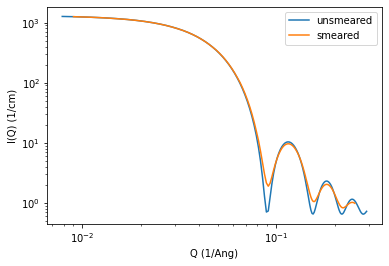

In [29]:
plt.loglog(resolution.q_calc, theory, label='unsmeared')
plt.loglog(resolution.q, Iq, label='smeared')

plt.legend()
plt.xlabel("Q (1/Ang)")
plt.ylabel("I(Q) (1/cm)")

In [13]:
np.equal(q, resolution.q_calc)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [10]:
resolution.q_calc

array([0.009 , 0.011 , 0.013 , 0.015 , 0.017 , 0.019 , 0.021 , 0.023 ,
       0.025 , 0.027 , 0.029 , 0.031 , 0.033 , 0.035 , 0.037 , 0.039 ,
       0.041 , 0.043 , 0.045 , 0.047 , 0.049 , 0.051 , 0.053 , 0.055 ,
       0.057 , 0.059 , 0.061 , 0.063 , 0.065 , 0.067 , 0.069 , 0.071 ,
       0.073 , 0.075 , 0.077 , 0.079 , 0.081 , 0.083 , 0.085 , 0.087 ,
       0.089 , 0.091 , 0.093 , 0.095 , 0.097 , 0.099 , 0.101 , 0.103 ,
       0.105 , 0.107 , 0.109 , 0.111 , 0.113 , 0.115 , 0.117 , 0.119 ,
       0.121 , 0.123 , 0.125 , 0.127 , 0.129 , 0.131 , 0.133 , 0.135 ,
       0.137 , 0.139 , 0.141 , 0.143 , 0.145 , 0.147 , 0.149 , 0.151 ,
       0.153 , 0.155 , 0.157 , 0.159 , 0.161 , 0.163 , 0.165 , 0.167 ,
       0.169 , 0.171 , 0.173 , 0.175 , 0.177 , 0.179 , 0.181 , 0.183 ,
       0.185 , 0.187 , 0.189 , 0.191 , 0.193 , 0.195 , 0.197 , 0.199 ,
       0.201 , 0.203 , 0.205 , 0.207 , 0.209 , 0.211 , 0.213 , 0.215 ,
       0.217 , 0.219 , 0.221 , 0.223 , 0.225 , 0.227 , 0.229 , 0.231 ,
      

In [18]:
# PARAMETER RANGES (ONLY THOSE PARAMETERS ARE FITTED)
model.scale.range(0, inf)
model.background.range(-inf, inf)
#model.sld.range(-inf, inf)
model.sld_solvent.range(-inf, inf)
#model.radius_polar.range(0, inf)
#model.radius_equatorial.range(0, inf)
#model.volfraction.range(0,0.74)
#model.charge.range(0, inf)
#model.temperature.range(0,1000)
#model.concentration_salt.range(0, 1)
#model.dielectconst.range(0,inf)

M = Experiment(data=data, model=model)

problem = FitProblem(M)

AttributeError: 'numpy.ndarray' object has no attribute 'scale'

In [13]:
#print(f"Initial chisq {problem.chisq()}")
problem.plot()

AttributeError: 'GpuKernel' object has no attribute 'make_kernel'